
# Chapter 4

## Question 13

(question 12 is about writing R functions, so I skipped it)

Try to predict whether a given suburb has a crime rate above or below the median.

In [1]:
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import sklearn.model_selection
import sklearn.discriminant_analysis
import sklearn.neighbors
sns.set(style="whitegrid")

In [2]:
boston = sm.datasets.get_rdataset("Boston", "MASS").data

In [3]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
crim_median = boston.crim.median()
crim_binary = np.where(boston.crim > crim_median, 1, 0)

boston["crim_binary"] = crim_binary



/home/wpg/.local/miniconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/wpg/.local/miniconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/wpg/.local/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


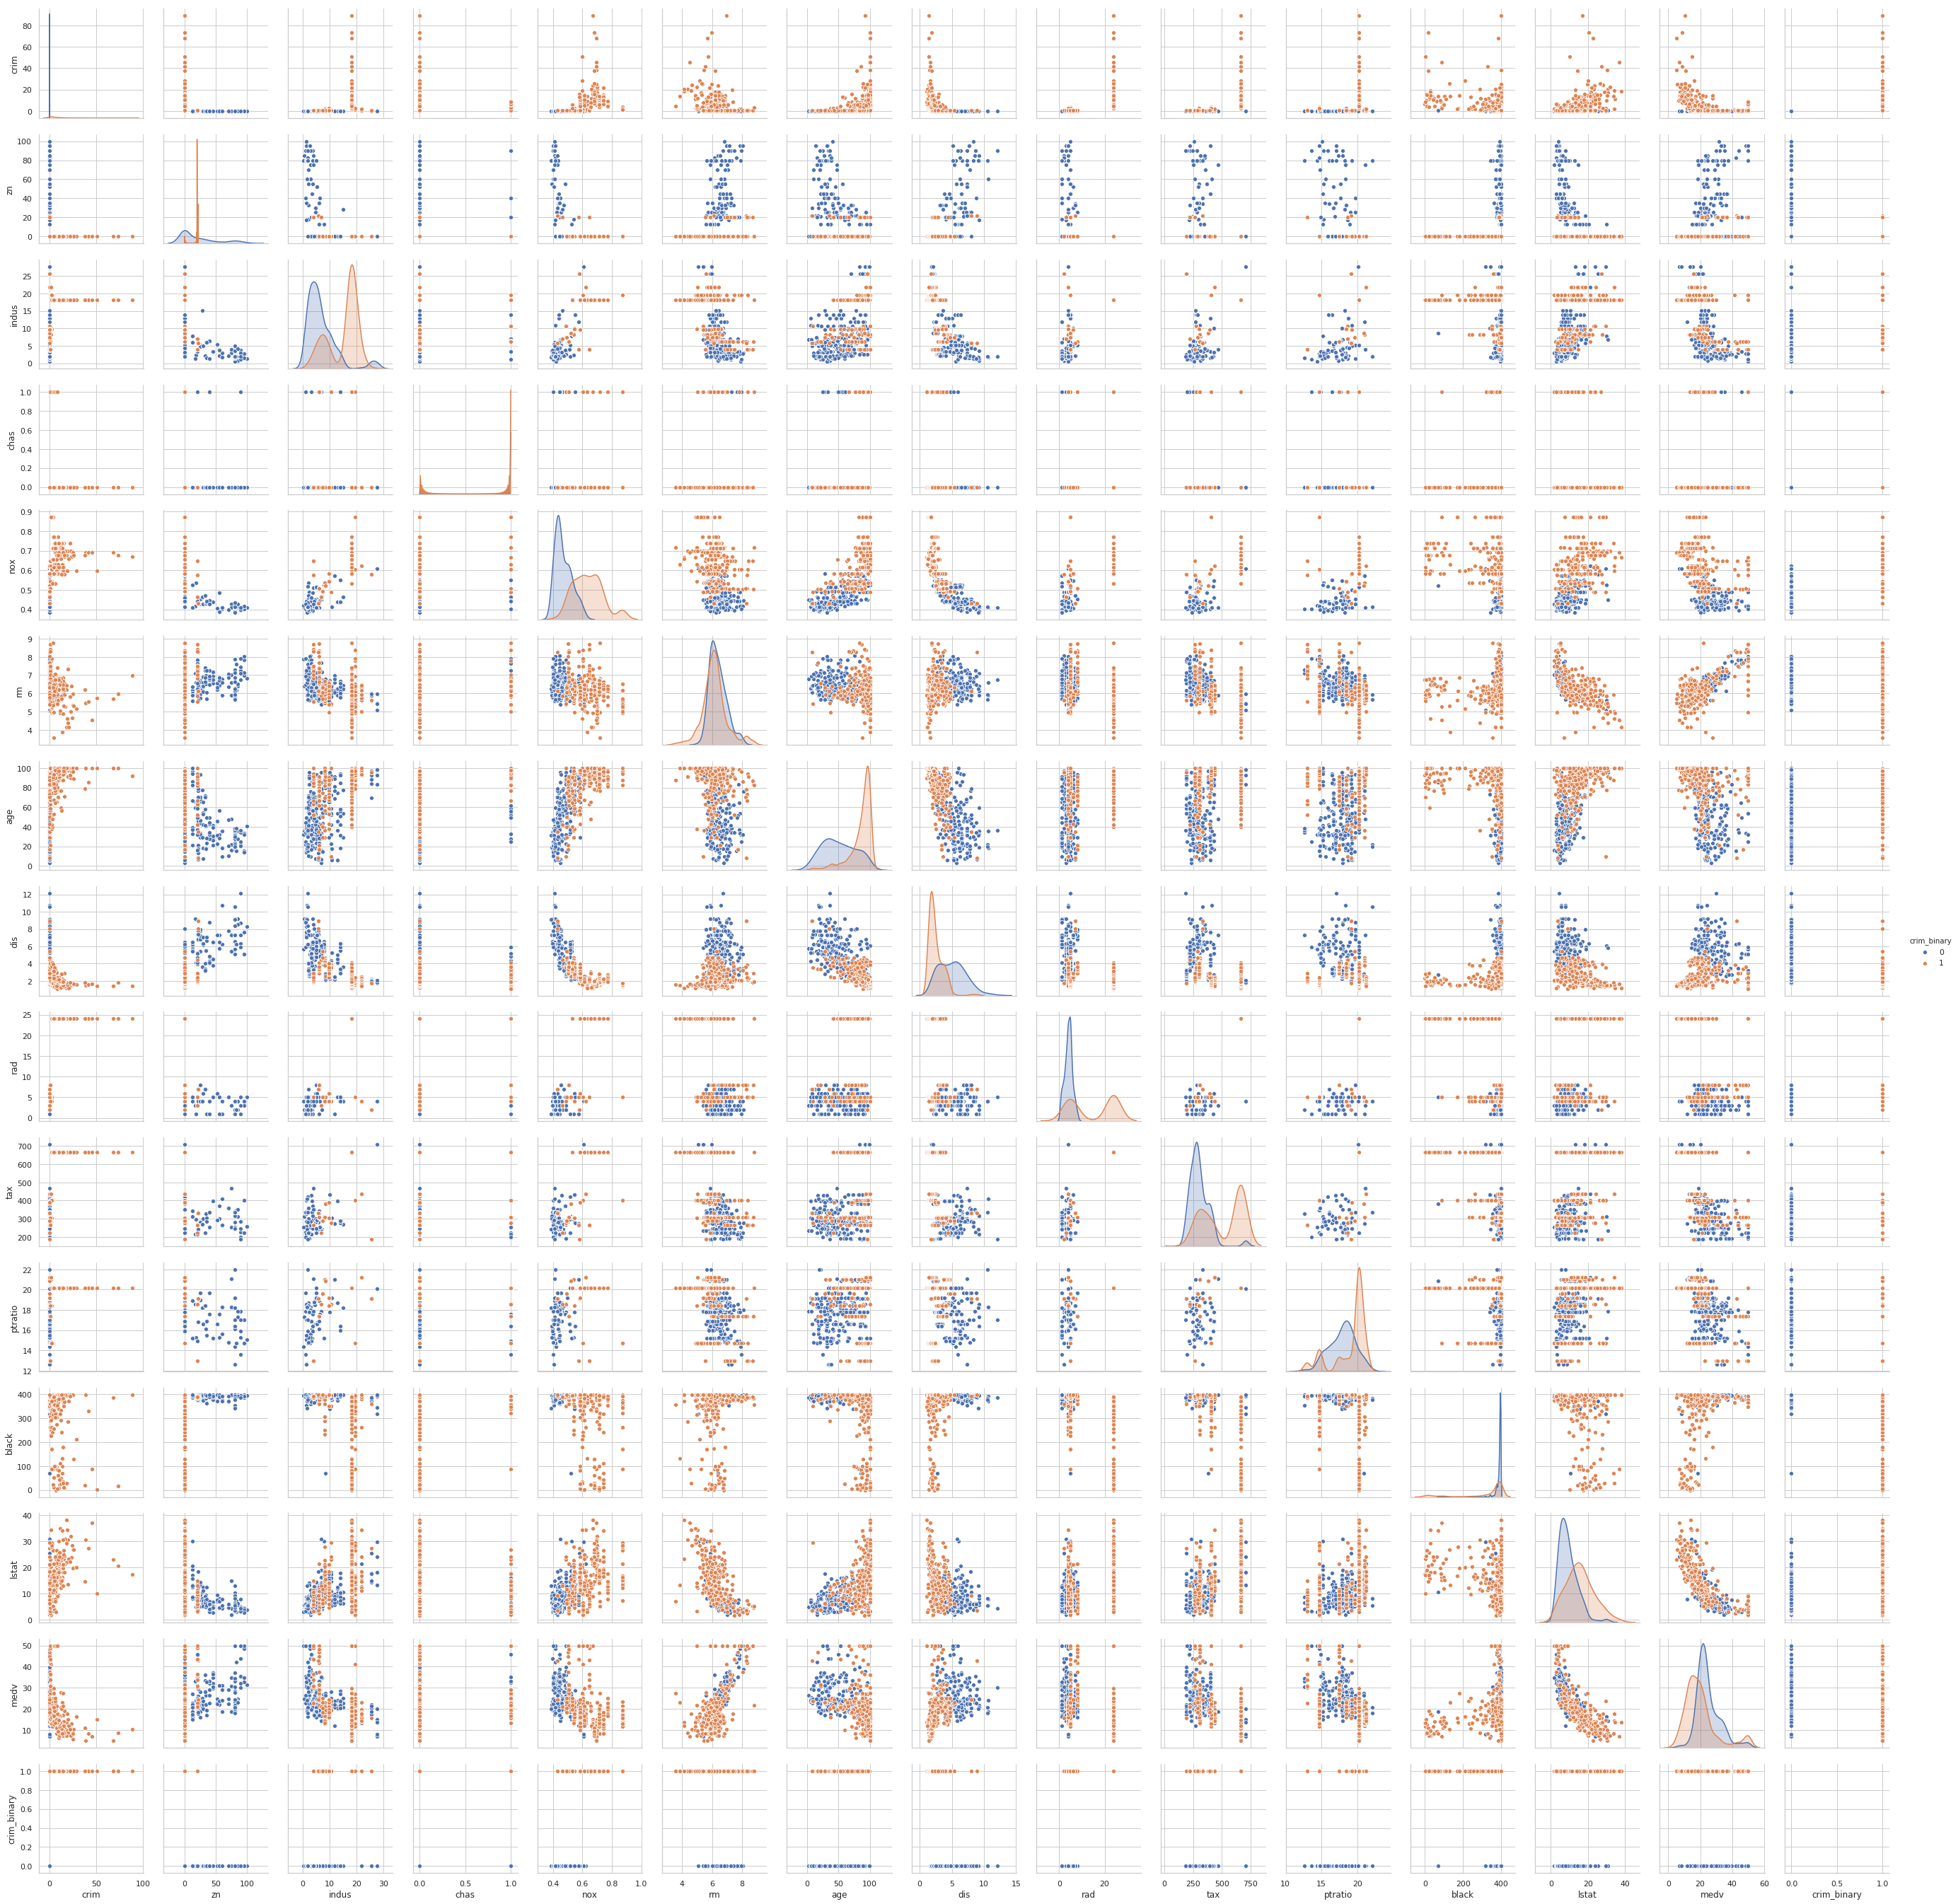

In [5]:
g = sns.pairplot(boston, hue="crim_binary")  #, diag_kws={"cut": 0})

Possible predictors:
- indus
- nox
- age
- dis
- rad

In [6]:
X = boston["indus nox age dis rad".split()]
y = boston.crim_binary
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=10)

### LDA

In [7]:
lda_model = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train) # reshape required to cast the training data to a 2d array
y_pred = lda_model.predict(X_test)

confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix.ravel()
print(confusion_matrix)
fraction_correct = (tn+tp)/(tn+tp+fn+fp)
print(f"fraction correct: {fraction_correct}")

[[54  2]
 [15 31]]
fraction correct: 0.8333333333333334


### QDA

In [8]:
qda_model = sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train) # reshape required to cast the training data to a 2d array
y_pred = qda_model.predict(X_test)

confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix.ravel()
print(confusion_matrix)
fraction_correct = (tn+tp)/(tn+tp+fn+fp)
print(f"fraction correct: {fraction_correct}")


[[54  2]
 [15 31]]
fraction correct: 0.8333333333333334


### Logistic regression

In [9]:
logistic_model = sklearn.linear_model.LogisticRegression()
logistic_model.fit(X_train, y_train) # reshape required to cast the training data to a 2d array
y_pred = logistic_model.predict(X_test)

confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix.ravel()
print(confusion_matrix)
fraction_correct = (tn+tp)/(tn+tp+fn+fp)
print(f"fraction correct: {fraction_correct}")

[[45 11]
 [ 9 37]]
fraction correct: 0.803921568627451


/home/wpg/.local/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### KNN

In [10]:
for k in range(1,6):
    print("-"*40)
    print(f"{k}")
    knn_model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train) # reshape required to cast the training data to a 2d array
    y_pred = knn_model.predict(X_test)

    confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix.ravel()
    print(f"confusion matrix:\n {confusion_matrix}")
    fraction_correct = (tn+tp)/(tn+tp+fn+fp)
    print(f"fraction correct:\n {fraction_correct:.2f}")


----------------------------------------
1
confusion matrix:
 [[44 12]
 [10 36]]
fraction correct:
 0.78
----------------------------------------
2
confusion matrix:
 [[51  5]
 [13 33]]
fraction correct:
 0.82
----------------------------------------
3
confusion matrix:
 [[42 14]
 [11 35]]
fraction correct:
 0.75
----------------------------------------
4
confusion matrix:
 [[45 11]
 [13 33]]
fraction correct:
 0.76
----------------------------------------
5
confusion matrix:
 [[40 16]
 [11 35]]
fraction correct:
 0.74


So our best results occur when using LDA on this subset.

In [11]:
# Use the full dataset instead.

X = boston.drop(columns=["crim_binary", "crim"])
y = boston.crim_binary
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=10)

### LDA

In [12]:
lda_model = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train) # reshape required to cast the training data to a 2d array
y_pred = lda_model.predict(X_test)

confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix.ravel()
print(confusion_matrix)
fraction_correct = (tn+tp)/(tn+tp+fn+fp)
print(f"fraction correct: {fraction_correct}")

[[53  3]
 [12 34]]
fraction correct: 0.8529411764705882


### QDA

In [13]:
qda_model = sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train) # reshape required to cast the training data to a 2d array
y_pred = qda_model.predict(X_test)

confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix.ravel()
print(confusion_matrix)
fraction_correct = (tn+tp)/(tn+tp+fn+fp)
print(f"fraction correct: {fraction_correct}")


[[53  3]
 [13 33]]
fraction correct: 0.8431372549019608


### Logistic regression

In [14]:
logistic_model = sklearn.linear_model.LogisticRegression()
logistic_model.fit(X_train, y_train) # reshape required to cast the training data to a 2d array
y_pred = logistic_model.predict(X_test)

confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix.ravel()
print(confusion_matrix)
fraction_correct = (tn+tp)/(tn+tp+fn+fp)
print(f"fraction correct: {fraction_correct}")

/home/wpg/.local/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[48  8]
 [11 35]]
fraction correct: 0.8137254901960784


### KNN

In [15]:
for k in range(1,10):
    print("-"*40)
    print(f"{k}")
    knn_model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train) # reshape required to cast the training data to a 2d array
    y_pred = knn_model.predict(X_test)

    confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix.ravel()
    print(f"confusion matrix:\n {confusion_matrix}")
    fraction_correct = (tn+tp)/(tn+tp+fn+fp)
    print(f"fraction correct:\n {fraction_correct:.2f}")


----------------------------------------
1
confusion matrix:
 [[47  9]
 [ 6 40]]
fraction correct:
 0.85
----------------------------------------
2
confusion matrix:
 [[53  3]
 [ 8 38]]
fraction correct:
 0.89
----------------------------------------
3
confusion matrix:
 [[53  3]
 [ 7 39]]
fraction correct:
 0.90
----------------------------------------
4
confusion matrix:
 [[53  3]
 [ 8 38]]
fraction correct:
 0.89
----------------------------------------
5
confusion matrix:
 [[53  3]
 [ 7 39]]
fraction correct:
 0.90
----------------------------------------
6
confusion matrix:
 [[53  3]
 [ 7 39]]
fraction correct:
 0.90
----------------------------------------
7
confusion matrix:
 [[50  6]
 [ 7 39]]
fraction correct:
 0.87
----------------------------------------
8
confusion matrix:
 [[50  6]
 [ 8 38]]
fraction correct:
 0.86
----------------------------------------
9
confusion matrix:
 [[49  7]
 [ 8 38]]
fraction correct:
 0.85


Including more information is giving us an improved fit (though the sample sizes are small). We go from 17 misclassified suburbs with the subset using LDA to 10 misclassified suburbs using KNN with K=5